In [1]:
import os 
import numpy as np
import pandas as pd

from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

In [2]:
import seaborn as sns
# import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager # to solve: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.

In [3]:
import sys
sys.path.append('../../')

import utils

# Config

In [10]:
# set global rc parameters
utils.config_rc(dpi=300, font_size=6)
# mpl.rcParams
wk_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir))

In [5]:
data_root = utils.get_path('baseline_wk_path', json_path=os.path.join(wk_root, '_data.json'))

# Data

In [6]:
baseline_raw_st_root =  os.path.join(data_root,'data/DLPFC')
outPath =  os.path.join(data_root,'output/DLPFC')

In [7]:
sample_index = ["151507","151508","151509","151510","151669","151670","151671","151672","151673","151674","151675","151676"]
algo_index = ["Leiden", 'Giotto', "stLearn", "SEDR", "SpaGCN", "BayesSpace", "SpaSEG"]

In [8]:
result_ari = pd.DataFrame(index=sample_index, columns=algo_index)
result_nmi = pd.DataFrame(index=sample_index, columns=algo_index)

for sample in sample_index:
    truth = pd.read_csv(os.path.join(baseline_raw_st_root,sample,"metadata.tsv"), sep="\t")
    ground_truth = truth["layer_guess"].astype("category").cat.codes

    leiden_meta = pd.read_csv(os.path.join(outPath,sample,"leiden", "metadata.tsv"), sep="\t")
    leiden_ari = adjusted_rand_score(np.array(ground_truth), np.array(leiden_meta["leiden_clusters"]))
    leiden_nmi = normalized_mutual_info_score(np.array(ground_truth), np.array(leiden_meta["leiden_clusters"]))
    result_ari.loc[sample,"Leiden"] = leiden_ari
    result_nmi.loc[sample,"Leiden"] = leiden_nmi

    Giotto_meta = pd.read_csv(os.path.join(outPath,sample,"Giotto", "metadata.tsv"), sep="\t")
    #get the same number of spots as Giotto prediction values
    label = truth.apply(lambda x: True if x.barcode in Giotto_meta["cell_ID"].values else False, axis=1)
    Giotto_ari = adjusted_rand_score(np.array(ground_truth[label]), np.array(Giotto_meta["HMRF_cluster"]))
    Giotto_nmi = normalized_mutual_info_score(np.array(ground_truth[label]), np.array(Giotto_meta["HMRF_cluster"]))
    result_ari.loc[sample,"Giotto"] = Giotto_ari
    result_nmi.loc[sample,"Giotto"] = Giotto_nmi

    stLearn_meta = pd.read_csv(os.path.join(outPath,sample,"stLearn", "metadata.tsv"), sep="\t")
    stLearn_ari = adjusted_rand_score(np.array(ground_truth), np.array(stLearn_meta["X_pca_kmeans"]))
    stLearn_nmi = normalized_mutual_info_score(np.array(ground_truth), np.array(stLearn_meta["X_pca_kmeans"]))
    result_ari.loc[sample,"stLearn"] = stLearn_ari
    result_nmi.loc[sample,"stLearn"] = stLearn_nmi

    SpaGCN_meta = pd.read_csv(os.path.join(outPath,sample,"SpaGCN", "metadata.tsv"), sep="\t")    
    SpaGCN_ari = adjusted_rand_score(np.array(ground_truth), np.array(SpaGCN_meta["refined_pred"]))
    SpaGCN_nmi = normalized_mutual_info_score(np.array(ground_truth), np.array(SpaGCN_meta["refined_pred"]))
    result_ari.loc[sample,"SpaGCN"] = SpaGCN_ari
    result_nmi.loc[sample,"SpaGCN"] = SpaGCN_nmi

    BayesSpace_meta = pd.read_csv(os.path.join(outPath,sample,"BayesSpace", "metadata.tsv"), sep="\t") 
    BayesSpace_ari = adjusted_rand_score(np.array(ground_truth), np.array(BayesSpace_meta["spatial.cluster"]))
    BayesSpace_nmi = normalized_mutual_info_score(np.array(ground_truth), np.array(BayesSpace_meta["spatial.cluster"]))
    result_ari.loc[sample,"BayesSpace"] = BayesSpace_ari
    result_nmi.loc[sample,"BayesSpace"] = BayesSpace_nmi

    SEDR_meta = pd.read_csv(os.path.join(outPath,sample,"SEDR", "metadata.tsv"), sep="\t")  
    SEDR_ari = adjusted_rand_score(np.array(ground_truth), np.array(SEDR_meta["SEDR"]))
    SEDR_nmi = normalized_mutual_info_score(np.array(ground_truth), np.array(SEDR_meta["SEDR"]))
    result_ari.loc[sample,"SEDR"] = SEDR_ari
    result_nmi.loc[sample,"SEDR"] = SEDR_nmi

    SpaSEG_meta = pd.read_csv(os.path.join(outPath,sample,"SpaSEG", "metadata.tsv"), sep="\t", index_col=0)
    SpaSEG_ari = adjusted_rand_score(np.array(ground_truth), np.array(SpaSEG_meta["SpaSEG_clusters"]))
    SpaSEG_nmi = normalized_mutual_info_score(np.array(ground_truth), np.array(SpaSEG_meta["SpaSEG_clusters"]))
    result_ari.loc[sample,"SpaSEG"] = SpaSEG_ari
    result_nmi.loc[sample,"SpaSEG"] = SpaSEG_nmi
    
result_ari.to_csv(os.path.join(wk_root, "notebook/results/Baseline/baseline_ari.csv"))
result_nmi.to_csv(os.path.join(wk_root, "notebook/results/Baseline/baseline_nmi.csv"))

In [8]:
result_ari = pd.read_csv(os.path.join(wk_root, "notebook/results/Baseline/baseline_ari.csv"),index_col=0)
result_nmi = pd.read_csv(os.path.join(wk_root, "notebook/results/Baseline/baseline_nmi.csv"),index_col=0)
result_ari = result_ari.reset_index(names=['sample_id'])
result_ari['sample_id'] = result_ari['sample_id'].astype(str) 
result_nmi = result_nmi.reset_index(names=['sample_id'])
result_nmi['sample_id'] = result_nmi['sample_id'].astype(str) 

In [9]:
def crt_df(orig_df, algo_index):
    out_df = None
    for i, x in enumerate(algo_index):
        tmp = orig_df[['sample_id', x]].copy().rename(columns={x: 'val'})
        tmp['algo'] = x
    
        if i == 0:
            out_df = tmp
        else:
            out_df = pd.concat([out_df, tmp])
    return out_df
    

In [10]:
ari_out = crt_df(result_ari, algo_index)
nmi_out = crt_df(result_nmi, algo_index)

In [11]:
ari_out.head()

,sample_id,val,algo
0,151507,0.398934,Leiden
1,151508,0.400132,Leiden
2,151509,0.393448,Leiden
3,151510,0.393098,Leiden
4,151669,0.351758,Leiden


In [12]:
bg_f = ['#a1c9f4', '#ffb482', '#8de5a1','#fab0e4' , '#d0bbff', '#debb9b', '#ff9f9b', '#cfcfcf', '#fffea3', '#b9f2f0']
ln_f = ['#023eff', '#ff7c00', '#1ac938','#f14cc1' , '#8b2be2', '#9f4800', '#e8000b', '#a3a3a3', '#ffc400', '#00d7ff']

In [13]:
from statannotations.Annotator import Annotator

In [19]:
def _boxplot(data, x, y, orders, ax, bg_f, ln_f,xlim=None):
    
    plot_param={
        'data':data,
        'x':y,
        'y':x,
        'order':orders,
        'orient':'h'
    }
    
    palette = dict(zip(orders, bg_f))
    
    sns.stripplot(**plot_param, ax = ax,palette=dict(zip(orders, ln_f)),size=2.5)
    
    axa = sns.boxplot(**plot_param,
                          ax=ax, palette=palette,
                          showfliers=False, 
                          flierprops={"marker": ".",'markersize': 3},
                          linewidth=0.8,showcaps=True,
                          width=0.6,saturation=0.6)
    
    for i,artist in enumerate(ax.patches): #In matplotlib 3.5 the boxes are stored in ax.patches instead of ax.artists.
        # Set the linecolor on the artist to the facecolor, and set the facecolor to None
        # col = artist.get_facecolor()
        # artist.set_edgecolor(col)
        # artist.set_facecolor('None')
        artist.set_edgecolor(ln_f[i])
    
        # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
        # Loop over them here, and use the same colour as above
        for j in range(i*5,i*5+5):
            line = axa.lines[j]
            # line.set_color(col)
            # line.set_mfc(col)
            # line.set_mec(col)

            line.set_color(ln_f[i])
            line.set_mfc(ln_f[i])
            line.set_mec(ln_f[i])

#     comp_pairs = [("Leiden","SpaSEG"), ('Giotto',"SpaSEG"), ("stLearn","SpaSEG"), ("SEDR","SpaSEG"), ("SpaGCN","SpaSEG"), ("BayesSpace","SpaSEG")]
#     annot = Annotator(axa, pairs=comp_pairs, **plot_param)
#     annot.configure(test='Mann-Whitney', comparisons_correction="BH", text_format='star', 
#                     line_width=0.5,fontsize=5,loc='inside',line_height=0.03, text_offset=0.5)
#     annot.apply_and_annotate()
    
#     xticklabels = axa.set_xticklabels(axa.get_xticklabels(),rotation=30, ha='right',rotation_mode="anchor")
#     for i, xticklabel in enumerate(xticklabels):
#         xticklabel.set_y(xticklabel.get_position()[1] +  0.01)
    axa.tick_params(direction='out', length=3, pad=3, width=1)
    if xlim is not None:
        ax.set_xlim(xlim)
    sns.despine()
#     plt.grid(color='0.9',linewidth=0.6)
    plt.xlabel(None)
    plt.ylabel(None)

    return axa

In [110]:
def _boxplot2(data, x, y, orders, ax, bg_f, ln_f,xlim=None):
    
    plot_param={
        'data':data,
        'x':x,
        'y':y,
        'order':orders,
    }
    
    palette = dict(zip(orders, bg_f))
    
#     sns.stripplot(**plot_param, ax = ax,palette=dict(zip(orders, ln_f)),size=2)
    
    axa = sns.boxplot(**plot_param,
                          ax=ax, palette=palette,
                          showfliers=True, 
                          flierprops={"marker": ".",'markersize': 3},
                          linewidth=0.8,showcaps=True,
                          width=0.6,saturation=1)
    
    for i,artist in enumerate(ax.patches): #In matplotlib 3.5 the boxes are stored in ax.patches instead of ax.artists.
        # Set the linecolor on the artist to the facecolor, and set the facecolor to None
        # col = artist.get_facecolor()
        # artist.set_edgecolor(col)
        # artist.set_facecolor('None')
        artist.set_edgecolor(ln_f[i])
    
        # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
        # Loop over them here, and use the same colour as above
        for j in range(i*6,i*6+6):
            line = axa.lines[j]
            # line.set_color(col)
            # line.set_mfc(col)
            # line.set_mec(col)

            line.set_color(ln_f[i])
            line.set_mfc(ln_f[i])
            line.set_mec(ln_f[i])

    comp_pairs = [("Leiden","SpaSEG"), ('Giotto',"SpaSEG"), ("stLearn","SpaSEG"), ("SEDR","SpaSEG"), ("SpaGCN","SpaSEG"), ("BayesSpace","SpaSEG")]
    annot = Annotator(axa, pairs=comp_pairs, **plot_param)
    annot.configure(test='Mann-Whitney', comparisons_correction="BH", text_format='star', 
                    line_width=0.5,fontsize=5,loc='inside',line_height=0.03, text_offset=0.5)
    annot.apply_and_annotate()
    
    xticklabels = axa.set_xticklabels(axa.get_xticklabels(),rotation=30, ha='right',rotation_mode="anchor")
    for i, xticklabel in enumerate(xticklabels):
        xticklabel.set_y(xticklabel.get_position()[1] +  0.01)
    axa.tick_params(direction='out', length=3, pad=3, width=1)
    sns.despine()
#     plt.grid(color='0.9',linewidth=0.6)
    plt.xlabel(None)
    plt.ylabel(None)

    return axa

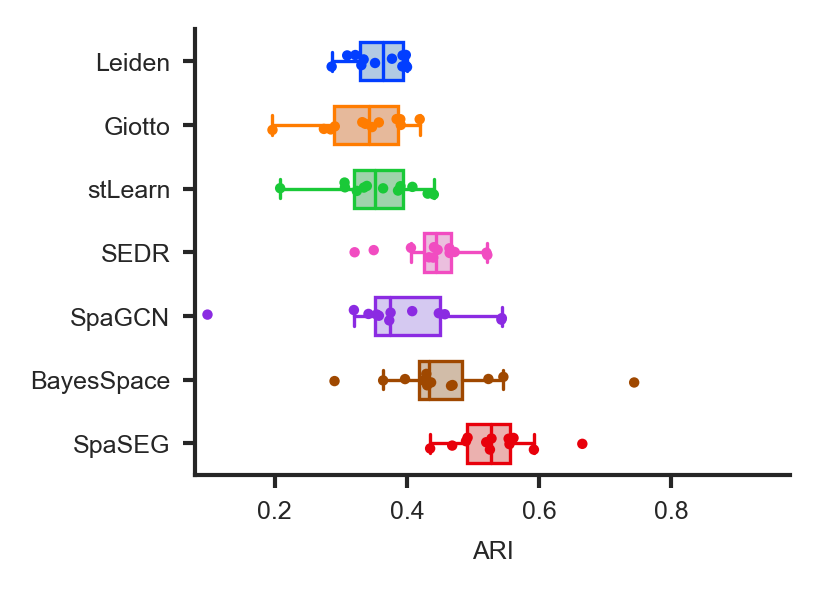

In [20]:
fig,ax = plt.subplots(figsize=(utils.centimeter*6.5, utils.centimeter*5))
axa=_boxplot(ari_out, 'algo', 'val', algo_index, ax, bg_f[:len(algo_index)], ln_f[:len(algo_index)],xlim=[0.08,0.98])
plt.xlabel('ARI')
plt.savefig(os.path.join(wk_root, "notebook/results/Baseline/baseline_ari.pdf"), bbox_inches='tight', format='pdf', dpi=400)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

BayesSpace vs. SpaSEG: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.202e-02 U_stat=2.800e+01
SpaGCN vs. SpaSEG: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.354e-03 U_stat=1.600e+01
SEDR vs. SpaSEG: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.652e-03 U_stat=1.700e+01
stLearn vs. SpaSEG: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.695e-05 U_stat=1.000e+00
Giotto vs. SpaSEG: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.658e-05 U_stat=0.000e+00
Leiden vs. SpaSEG: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.658e-05 U_stat=0.000e+00


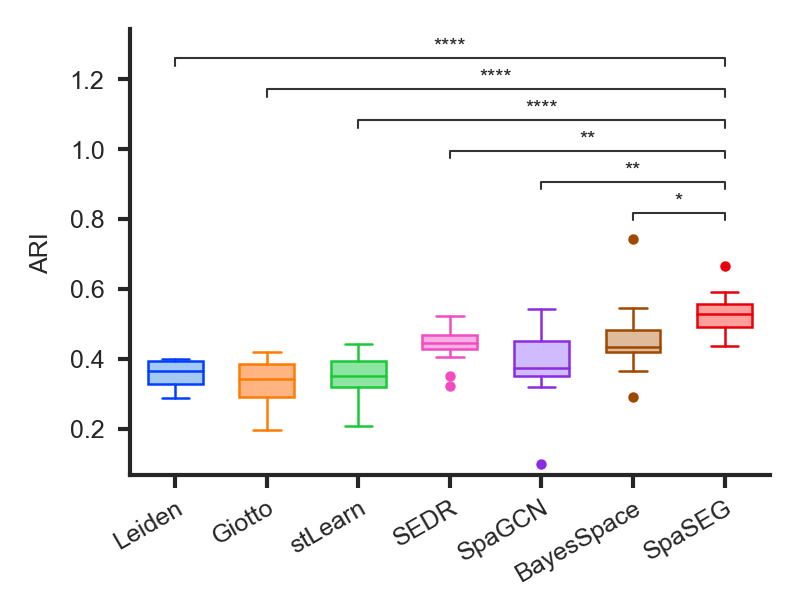

In [111]:
fig,ax = plt.subplots(figsize=(utils.centimeter*7, utils.centimeter*5))
axa=_boxplot2(ari_out, 'algo', 'val', algo_index, ax, bg_f[:len(algo_index)], ln_f[:len(algo_index)])
plt.ylabel('ARI')
# plt.savefig(os.path.join(wk_root, "notebook/results/Baseline/baseline_ari.pdf"), bbox_inches='tight', format='pdf', dpi=400)

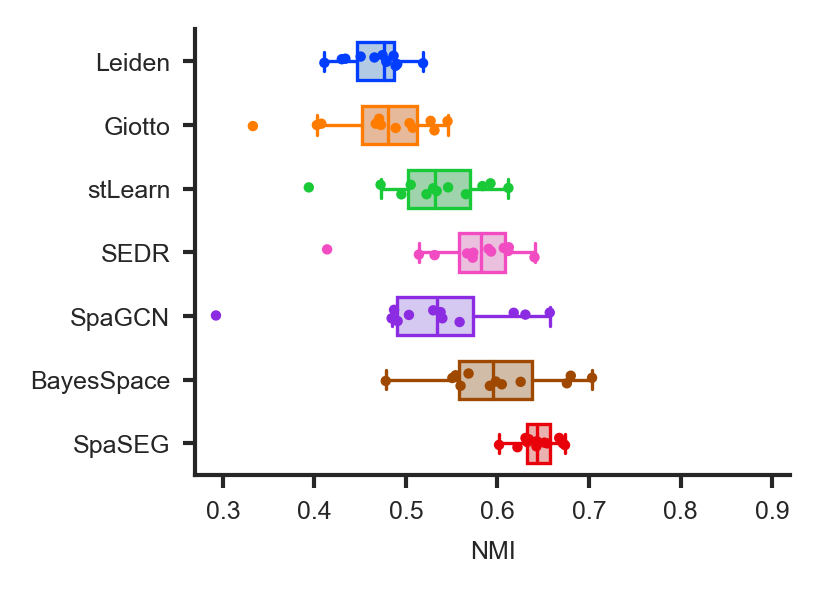

In [21]:
fig,ax = plt.subplots(figsize=(utils.centimeter*6.5, utils.centimeter*5))
axa=_boxplot(nmi_out, 'algo', 'val', algo_index, ax, bg_f[:len(algo_index)], ln_f[:len(algo_index)],xlim=[0.27,0.92] )
plt.xlabel('NMI')
plt.savefig(os.path.join(wk_root, "notebook/results/Baseline/baseline_nmi.pdf"), bbox_inches='tight', format='pdf',dpi=400)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

BayesSpace vs. SpaSEG: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.060e-02 U_stat=3.900e+01
SpaGCN vs. SpaSEG: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.920e-04 U_stat=1.200e+01
SEDR vs. SpaSEG: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.462e-04 U_stat=8.000e+00
stLearn vs. SpaSEG: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.695e-05 U_stat=1.000e+00
Giotto vs. SpaSEG: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.658e-05 U_stat=0.000e+00
Leiden vs. SpaSEG: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.658e-05 U_stat=0.000e+00


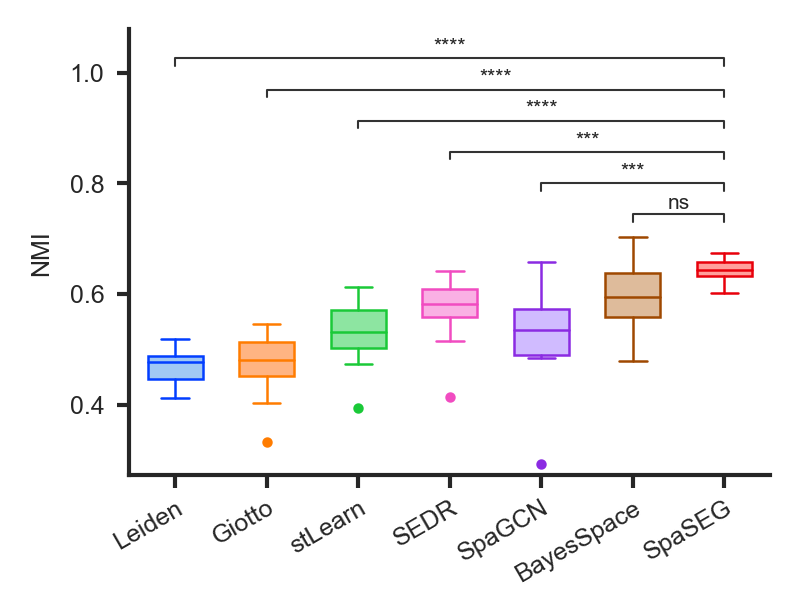

In [112]:
fig,ax = plt.subplots(figsize=(utils.centimeter*7, utils.centimeter*5))
axa=_boxplot2(nmi_out, 'algo', 'val', algo_index, ax, bg_f[:len(algo_index)], ln_f[:len(algo_index)])
plt.ylabel('NMI')
# plt.savefig(os.path.join(wk_root, "notebook/results/Baseline/baseline_nmi.pdf"), bbox_inches='tight', format='pdf', dpi=400)

In [129]:
ari_out[['val','algo']].groupby(['algo']).agg(['min','max','mean','median','std'])

val                                        
                 min       max      mean    median       std
algo                                                        
BayesSpace  0.290486  0.743747  0.460175  0.433587  0.111793
Giotto      0.196622  0.419343  0.333767  0.342116  0.062978
Leiden      0.286131  0.400132  0.358029  0.364568  0.040521
SEDR        0.320880  0.521625  0.440039  0.443690  0.059480
SpaGCN      0.098308  0.543579  0.385028  0.374284  0.116802
SpaSEG      0.435099  0.665319  0.532147  0.526749  0.060545
stLearn     0.208242  0.440685  0.353311  0.351672  0.064847

In [127]:
nmi_out[['val','algo']].groupby(['algo']).agg(['min','max','mean','median','std'])

val                                        
                 min       max      mean    median       std
algo                                                        
BayesSpace  0.477997  0.703372  0.599214  0.594958  0.064390
Giotto      0.332822  0.545459  0.471470  0.480793  0.062397
Leiden      0.410946  0.518767  0.467284  0.476542  0.030596
SEDR        0.413923  0.640506  0.568987  0.581915  0.060161
SpaGCN      0.292470  0.657156  0.527488  0.533887  0.094133
SpaSEG      0.601756  0.673818  0.643789  0.642827  0.021390
stLearn     0.393925  0.611976  0.529344  0.531688  0.059351

# Running time and Memory

In [6]:
# runing time

runing_t = pd.read_csv('runing_time.csv')
runing_t['n_spot'] = runing_t['n_spot']/1000 

In [7]:
runing_t

,platform,n_spot,SpaSEG,SpaGCN,BayesSpace,Leiden
0,MERFISH,6.412,1.2,1.5,2.6,0.33
1,seqFISH,19.416,11.5,3.2,10.5,1.10
2,Slide-SeqV2,53.208,10.9,42.4,33.3,4.00
3,Bin50,84.724,4.2,110.0,NaN,5.20
4,Bin20,526.716,12.1,NaN,NaN,32.00


In [35]:
from matplotlib.gridspec import GridSpec
def _lineplot(df, x, y_list, ax, colc):
    for y,c in zip(y_list,colc):
        ax.plot(x, y, data=df, marker='o', markersize=1.5, linewidth=0.5, linestyle='--', color=c, markerfacecolor=c, markeredgecolor=None, label=y)
    
    ax.tick_params(direction='out', length=3, pad=3, width=1)

def _brokenplot(df, x, y_list, colc,xlabel, ylabel):
    fig = plt.figure(figsize=(utils.centimeter*5.7, utils.centimeter*4.2))
    gs = GridSpec(1, 2, wspace=0.1,width_ratios=[7.5,1])
    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])

    _lineplot(df, x, y_list, ax1, colc)
    _lineplot(df, x, y_list, ax2, colc)

    ax1.set_xlim(-2, 95)  
    ax2.set_xlim(523, 530)  
    ax2.set_xticks([525])

    ax1.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.set_yticks([])

    # broken axis
    d = 2  # proportion of vertical to horizontal extent of the slanted line
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=5,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    ax1.plot([1, 1], [1, 0], transform=ax1.transAxes, **kwargs)
    ax2.plot([0, 0], [1, 0], transform=ax2.transAxes, **kwargs)

    ax1.legend(frameon=False,fontsize=5,handlelength=1.5)

    ax1.set_ylabel(ylabel)
    fig.text(0.5, -0.05, xlabel, va='center', ha='center', fontsize=6)        

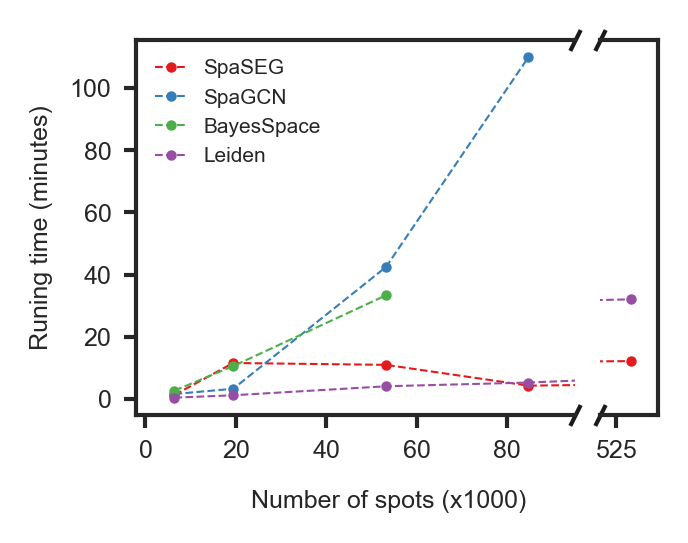

In [36]:
colc = ['#e41a1c','#377eb8','#4daf4a','#984ea3']
x = 'n_spot'
y_list = ['SpaSEG','SpaGCN','BayesSpace','Leiden']

ylabel = 'Runing time (minutes)'
xlabel = 'Number of spots (x1000)'

_brokenplot(runing_t, x, y_list, colc,xlabel, ylabel)

plt.savefig(os.path.join(wk_root, "notebook/results/Baseline/running_time.pdf"), bbox_inches='tight', format='pdf',dpi=400)

In [17]:
memory = pd.read_csv('memory_usage.csv')
memory['n_spot'] = memory['n_spot']/1000 

In [18]:
memory

,platform,n_spot,SpaSEG,SpaGCN,BayesSpace,Leiden
0,MERFISH,6.412,2.5,2.0,1.5,0.84
1,seqFISH,19.416,2.9,8.0,2.4,0.58
2,Slide-SeqV2,53.208,6.9,52.6,38.8,15.80
3,Bin50,84.724,3.5,122.4,NaN,2.40
4,Bin20,526.716,5.7,NaN,NaN,7.10


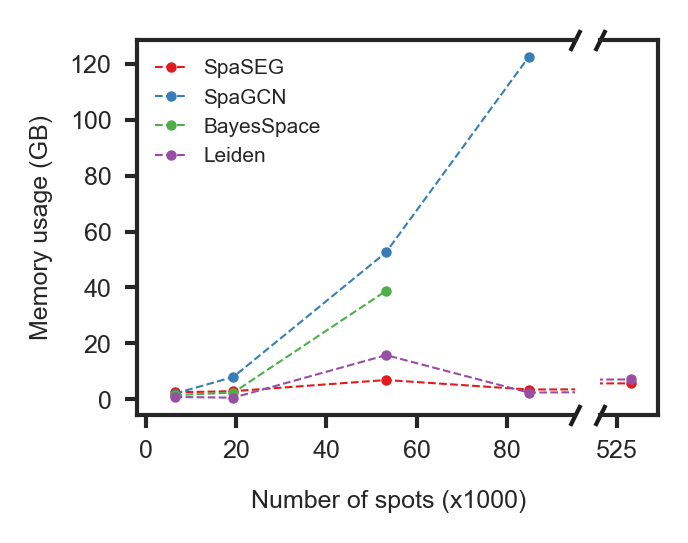

In [37]:
ylabel = 'Memory usage (GB)'

_brokenplot(memory, x, y_list, colc,xlabel, ylabel)
plt.savefig(os.path.join(wk_root, "notebook/results/Baseline/memory.pdf"), bbox_inches='tight', format='pdf',dpi=400)

In [ ]:
# ARI for Stereo-seq cellbin, MERFISH and seqFISH

